source: https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
# download model weights and config
os.makedirs("yolo-coco", exist_ok=True)
cmd = "wget https://pjreddie.com/media/files/yolov3.weights -P yolo-coco -nc"
print(os.system(cmd))
cmd = "wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -P yolo-coco -nc"
print(os.system(cmd))
cmd = "wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -P yolo-coco -nc"
print(os.system(cmd))

In [2]:
# input image
image_path = "../data/2013_CrossFit_Games_-_Stadium_relay.jpg"
# image_path = "../data/eagle.jpg"
# directory with COCO labels and YOLOv3 weights
yolo = "./yolo-coco"
# detection probability
confidence_thresh = 0.5
# NMS threshold
threshold = 0.4

In [3]:
# load the COCO class labels our YOLO model was trained on
labels_path = os.path.join(yolo, "coco.names")
LABELS = open(labels_path).read().strip().split("\n")

# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

In [4]:
# retrieve paths to the YOLO weights and model configuration
weightsPath = os.path.join(yolo, "yolov3.weights")
configPath = os.path.join(yolo, "yolov3.cfg")

# load our YOLO object detector trained on COCO dataset (80 classes)
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [12]:
ln

['yolo_82', 'yolo_94', 'yolo_106']

In [5]:
# load our input image and grab its spatial dimensions
image = cv2.imread(image_path)
(H, W) = image.shape[:2]
# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
# show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 0.712656 seconds


In [6]:
# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

In [7]:
# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > confidence_thresh:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [8]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence, threshold)

In [14]:
boxes= idxs

AttributeError: 'list' object has no attribute 'shape'

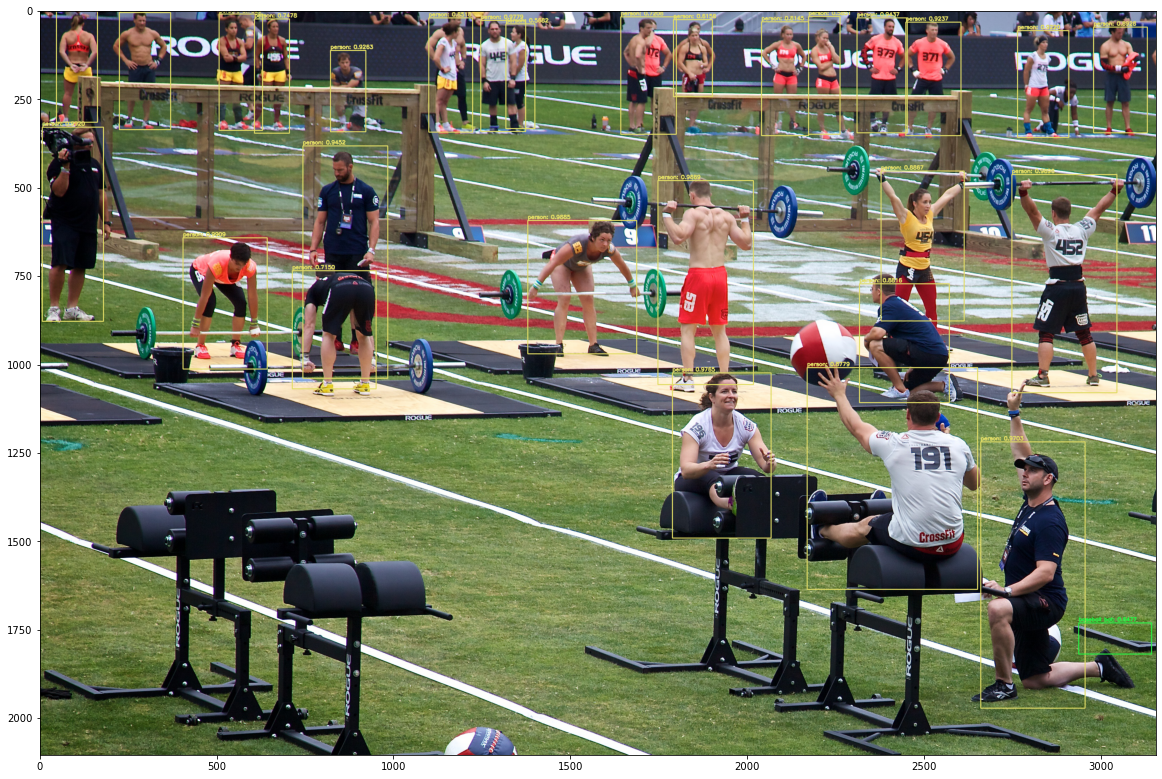

In [10]:
# ensure at least one detection exists
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, color, 2)
        
        
# # show the output image using OpenCV
# cv2.imshow("Image", image)
# cv2.waitKey(0)
# # Closes all the frames
# cv2.destroyAllWindows()

# show the output image using matplotlib
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# test yolodetect class

In [1]:
import os
import yoloDetect
import cv2

In [2]:
folder = "../data/football_clips"
avis = [os.path.join(folder, f) for f in os.listdir(folder)]
len(avis)

6

In [3]:
YD = yoloDetect.yoloDetect(
    yolo_path="./yolo-coco",
    confidence_threshold=0.5,
    nms_threshold=0.2,
    output_path="/tmp"
)
YD.image_path = "dummy.jpg"

[INFO] loading YOLO from disk...


In [4]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(avis[0])

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    
    YD.image_to_blob(frame)
    YD.run_detection()
    YD.plot_results()
    image_output = YD.image
    
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame', image_output)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()